# Chapter 3 - Data Preprocessing

Answer questions from the book [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) Chapter 3

Dataset: 
glass.data [description](../data/glass.names)


In [88]:
from sklearn.experimental import enable_iterative_imputer

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer

In [90]:
df = pd.read_csv('../data/glass.data', header=None)

In [91]:
df.columns = ['id', 'refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']

In [92]:
df.head()

,id,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Before Scaling

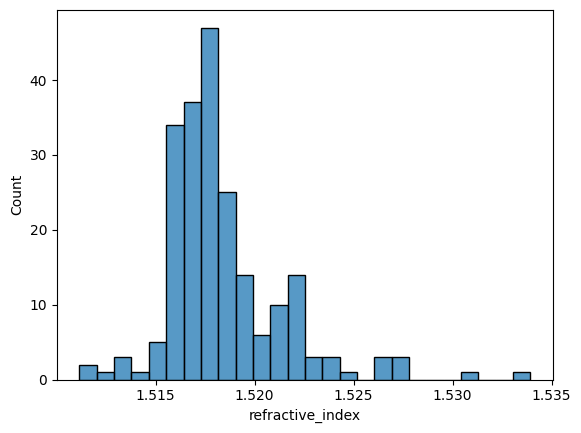

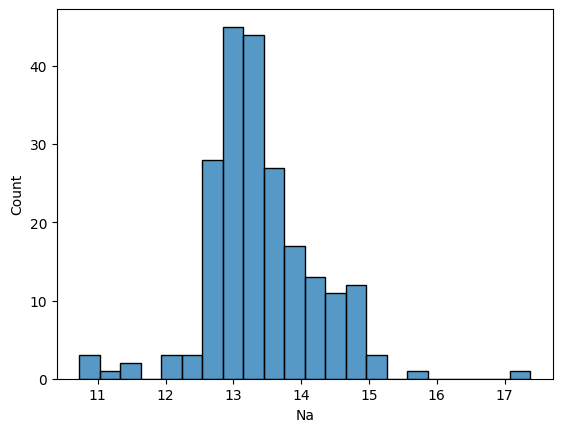

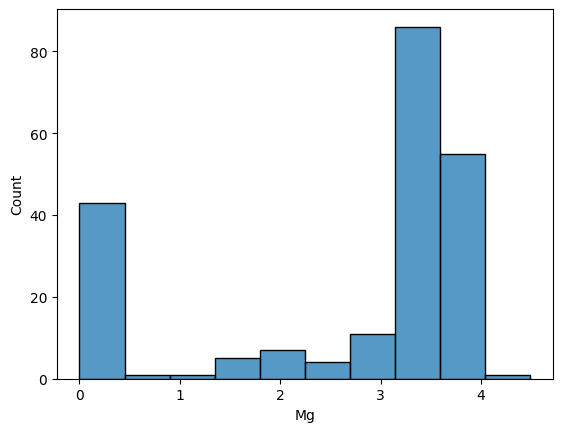

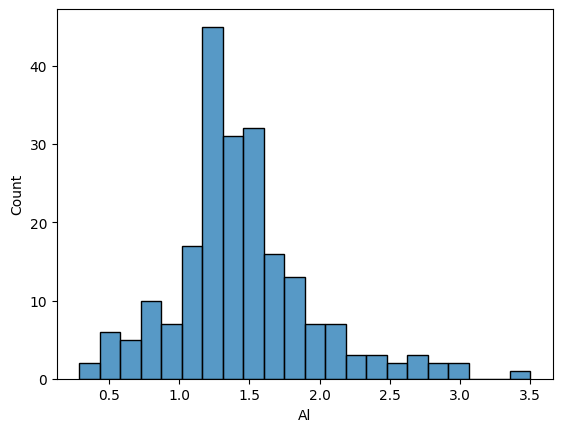

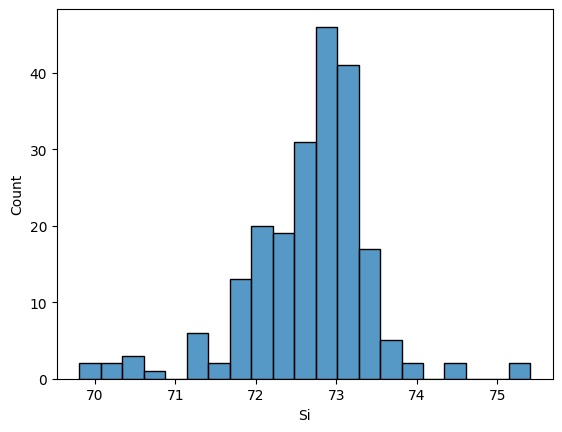

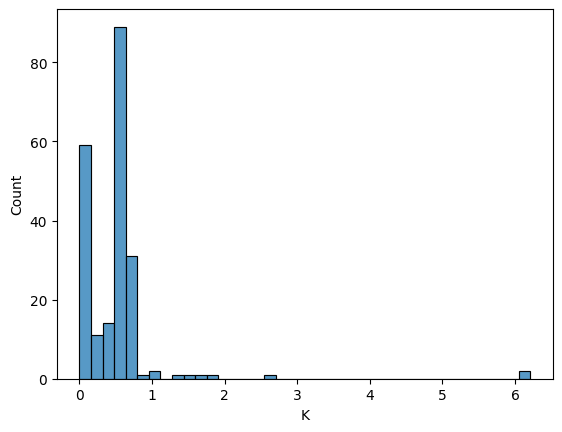

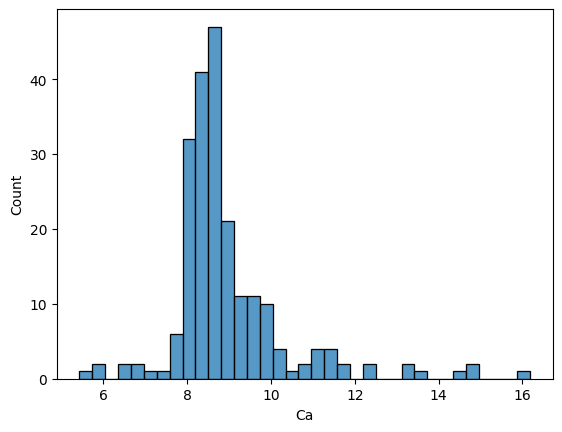

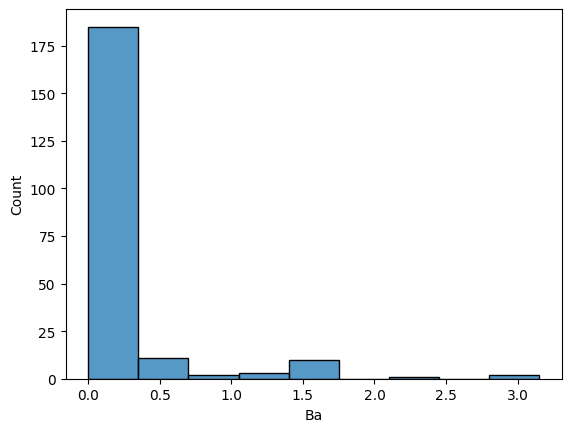

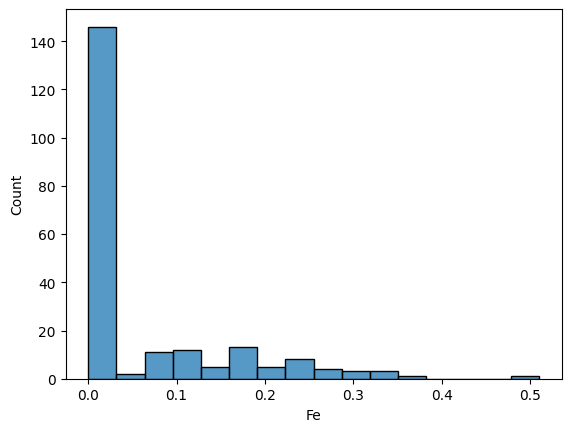

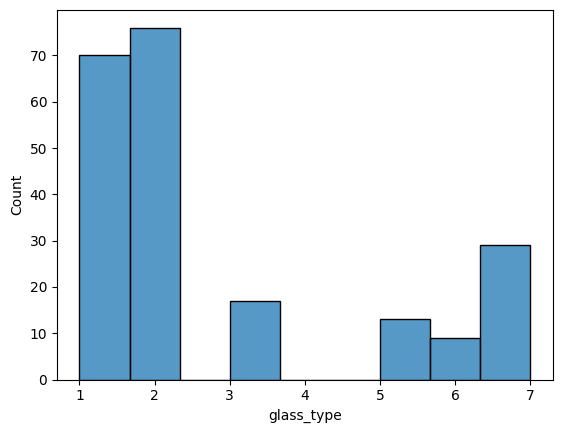

In [93]:
for col in df.columns[1:]:
    sns.histplot(data=df, x=col)
    plt.show()

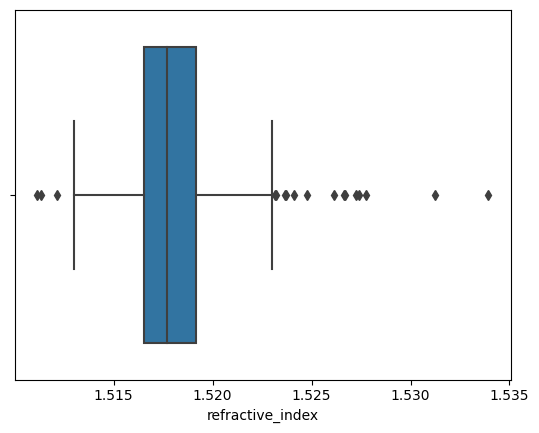

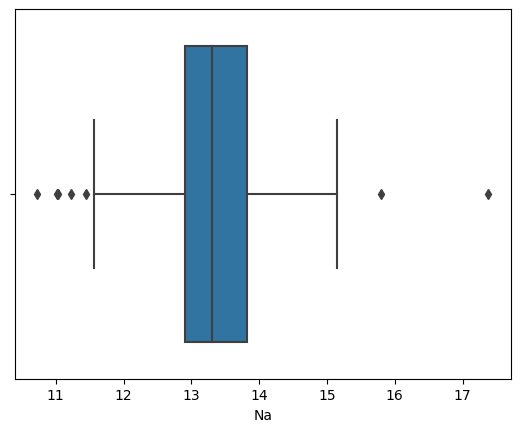

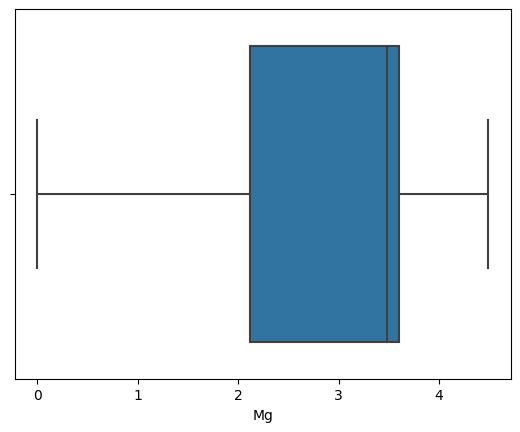

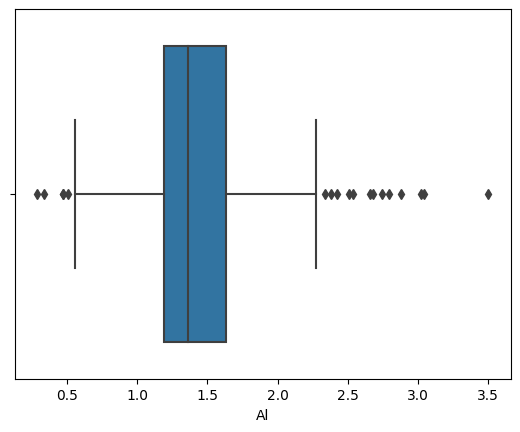

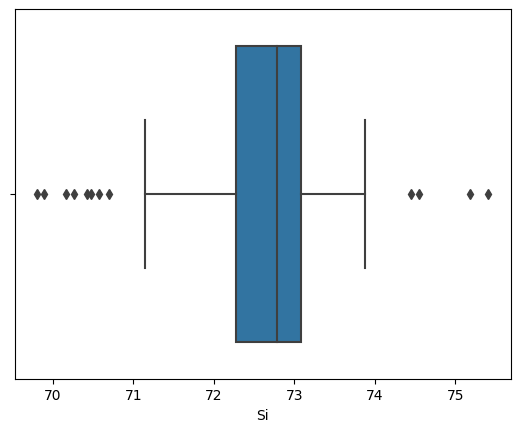

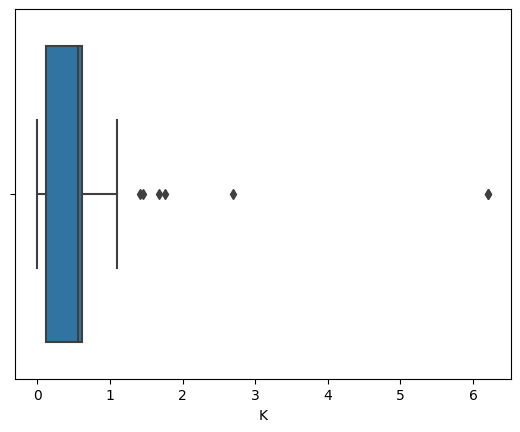

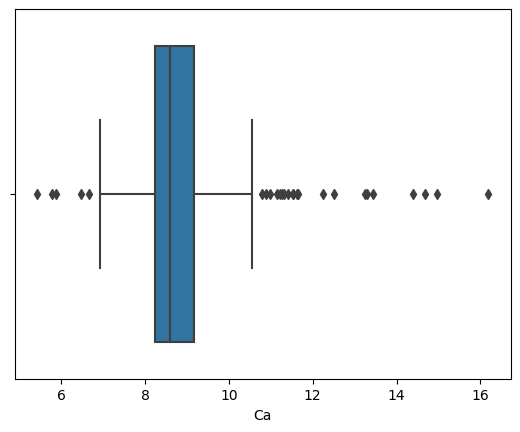

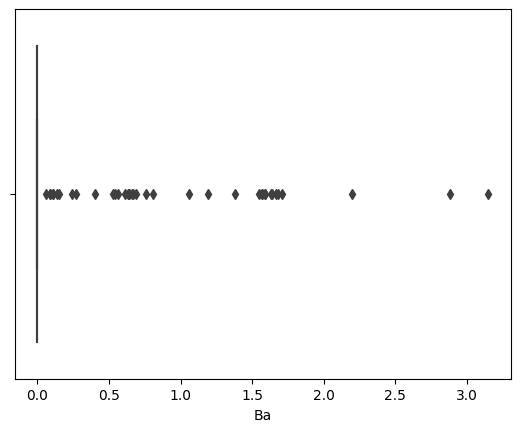

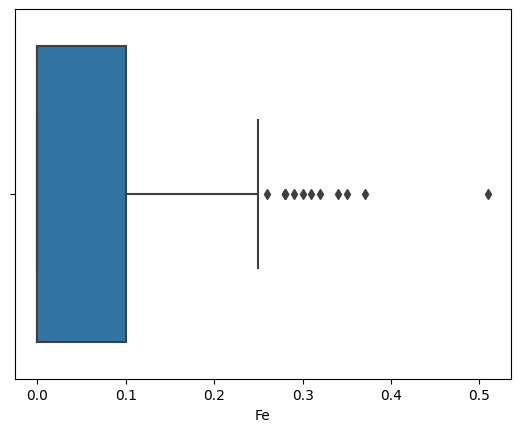

In [94]:
for col in df.columns[1:-1]:
    sns.boxplot(x=df[col])
    plt.show()
    

## After Scaling

In [95]:
# center and scale the data using StandardScaler
scaled_df = pd.DataFrame(columns=df.columns, index=df.index)

for col in df.columns[1:-1]:

    temp_array = np.array(df[col])
    temp_array = temp_array.reshape(-1, 1)
    scaler = StandardScaler()
    scaler.fit(temp_array)
    scaled_df[col] = scaler.transform(temp_array)

scaled_df['id'] = df['id']
scaled_df['glass_type'] = df['glass_type']
scaled_df.head()

,id,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,2,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,3,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,4,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,5,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


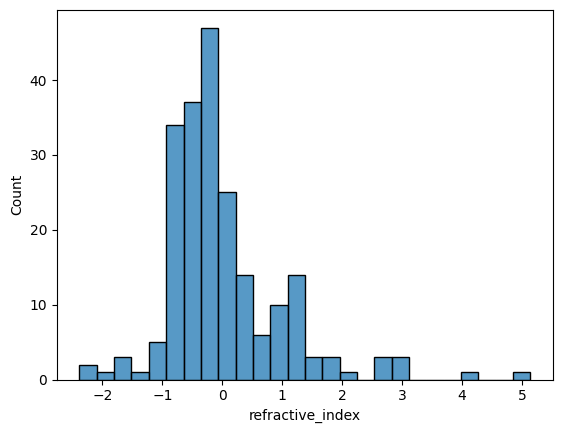

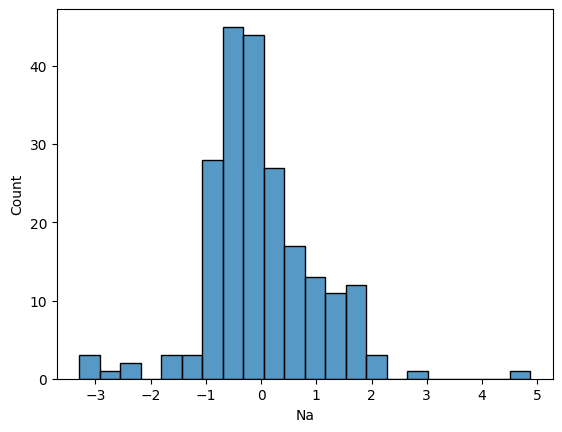

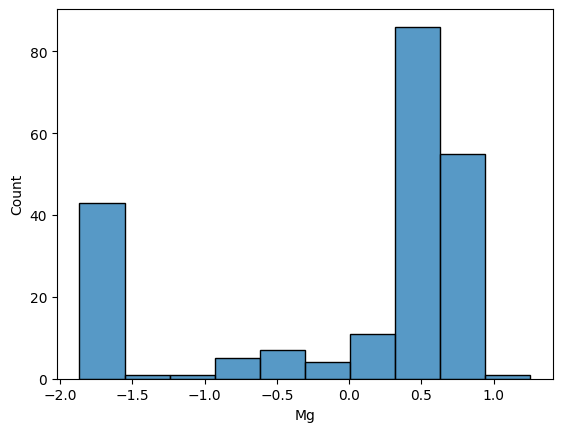

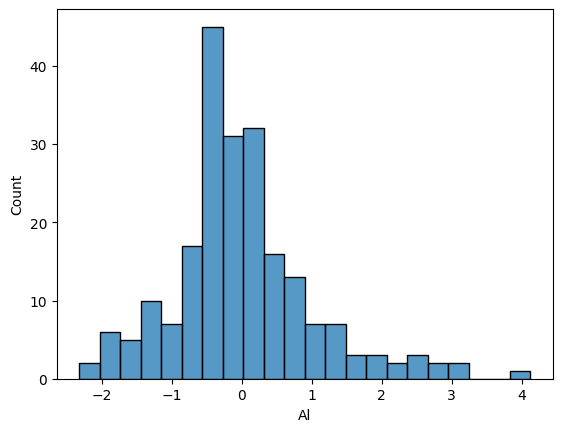

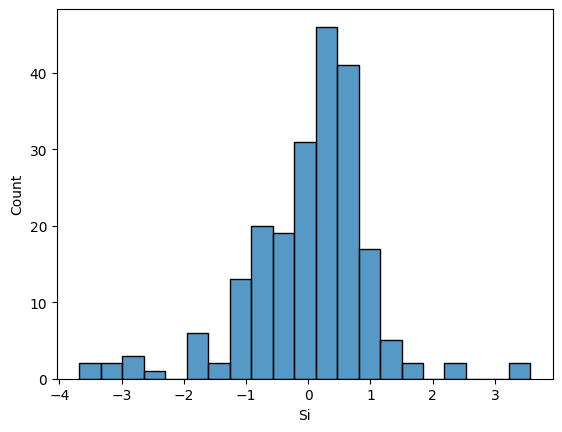

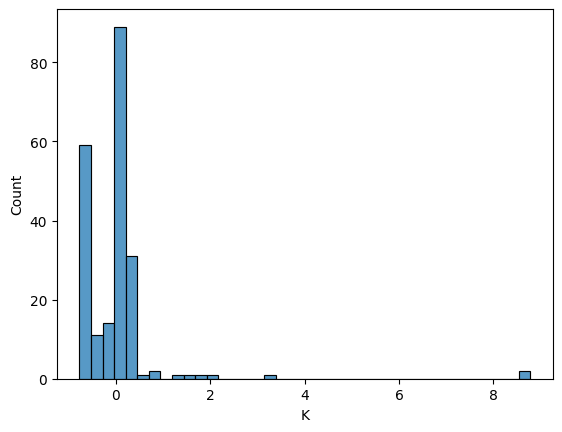

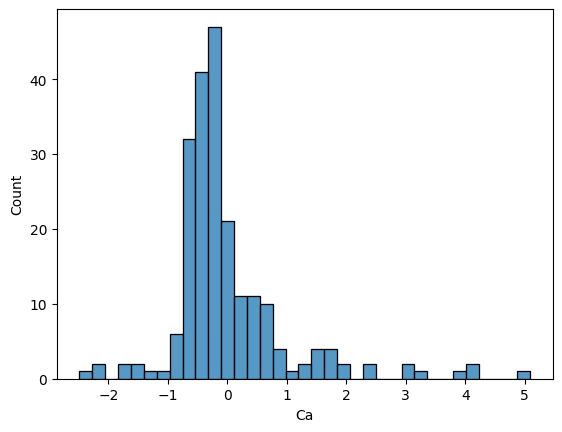

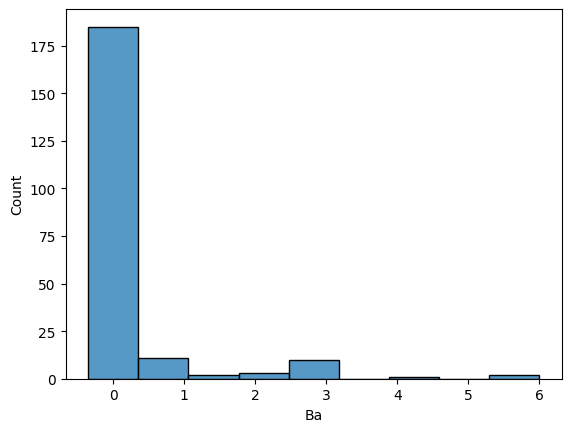

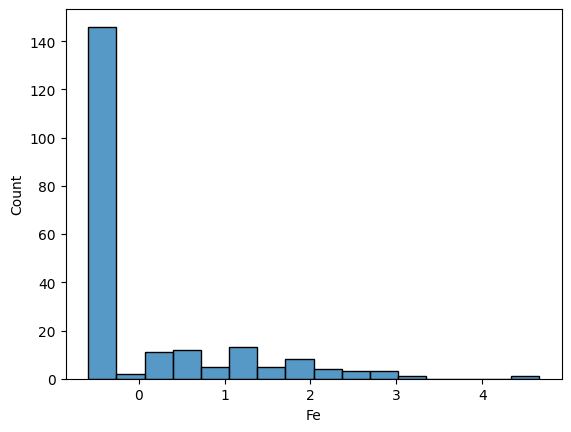

In [96]:
for col in df.columns[1:-1]:
    sns.histplot(x=scaled_df[col])
    plt.show()

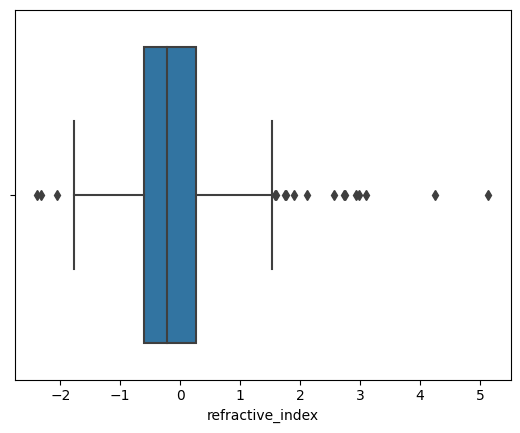

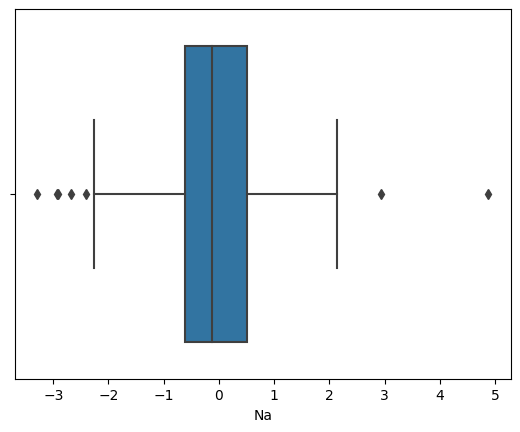

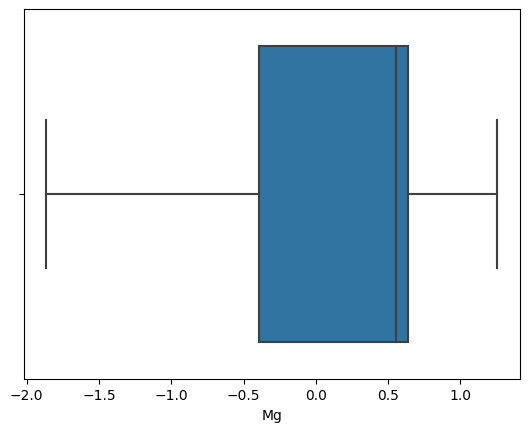

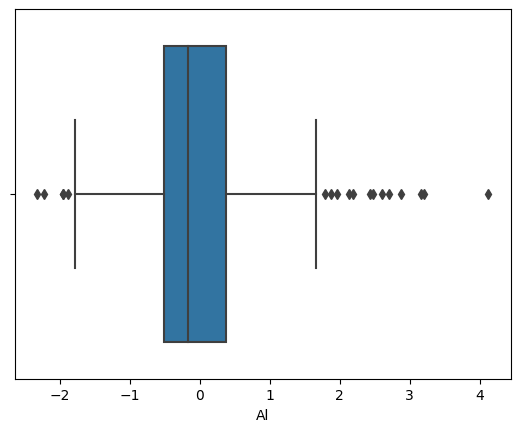

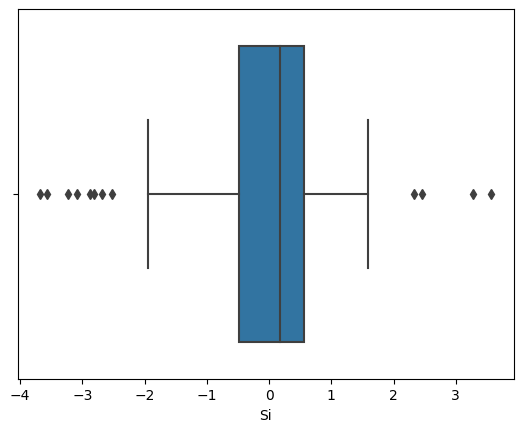

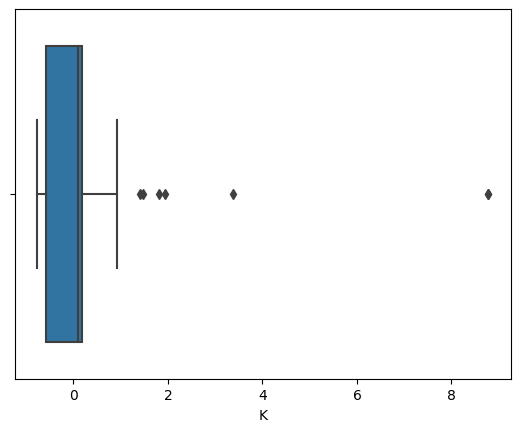

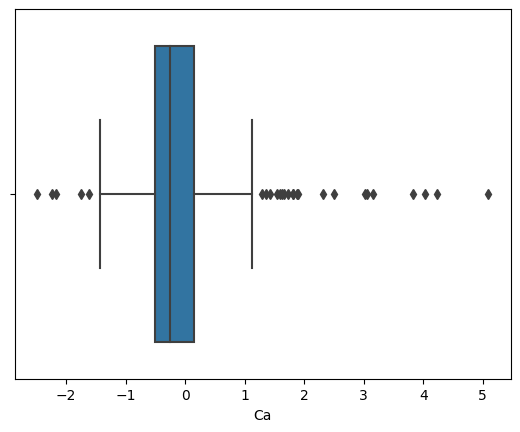

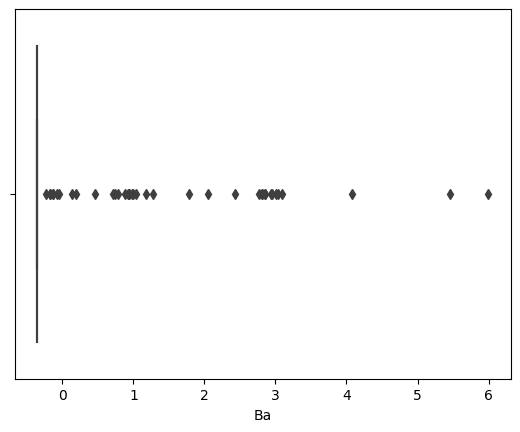

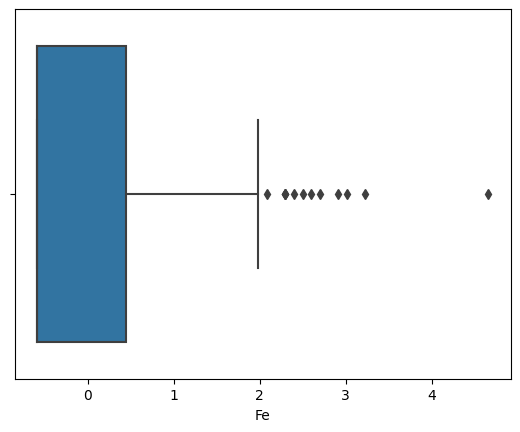

In [97]:
for col in scaled_df.columns[1:-1]:
    sns.boxplot(x=scaled_df[col])
    plt.show()

## Distribution Analysis
- Refractive Index: right skew with many outliers
- Na: almost normal but slight right skew and a handful of outliers
- Mg: left skew with no outliers
- Al: slight right skew and many outliers
- Si: fairly normal with many outliers
- K: severe right skew with a handful of outliers and one extreme outlier
- Ca: slight right skew with many outliers
- Ba: severe right skew with many and extreme outliers
- Fe: severe right skew with about two handfuls of outliers

### Transformations are mostly needed for refractive index, Mg, Al, K, Ca, Ba, and Fe. Not needed for Na and Si.

## Check for Transformations

In [98]:
# use yeo-johnson since it works with + and - values
trans_df = scaled_df.copy()
for col in trans_df.columns[1:-1]:
    data = np.array(trans_df[col]).reshape(-1, 1)

    pt = PowerTransformer(method='yeo-johnson')
    pt.fit(data)
    print(col)
    print(pt.lambdas_, '\n')
    trans_df[col] = pt.transform(data)

trans_df.head()

refractive_index
[0.40030846] 

Na
[0.84627388] 

Mg
[2.70821049] 

Al
[0.63491533] 

Si
[1.25886398] 

K
[-0.14912785] 

Ca
[0.3413213] 

Ba
[-3.85267912] 

Fe
[-1.19403869] 



,id,refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,0.993277,0.332733,3.119179,-0.676369,-1.119899,-1.296932,0.033991,-0.455438,-0.682857,1
1,2,-0.098133,0.625148,0.664554,-0.059159,0.020551,0.276735,-0.935395,-0.455438,-0.682857,1
2,3,-0.763365,0.200761,0.564319,0.315131,0.386491,0.011691,-0.995965,-0.455438,-0.682857,1
3,4,-0.077227,-0.197547,0.854347,-0.217064,-0.139271,0.504553,-0.490090,-0.455438,-0.682857,1
4,5,-0.179082,-0.121192,0.705682,-0.333741,0.518724,0.456850,-0.655590,-0.455438,-0.682857,1


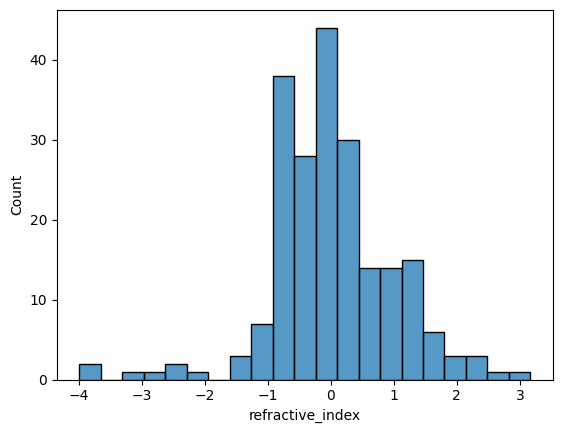

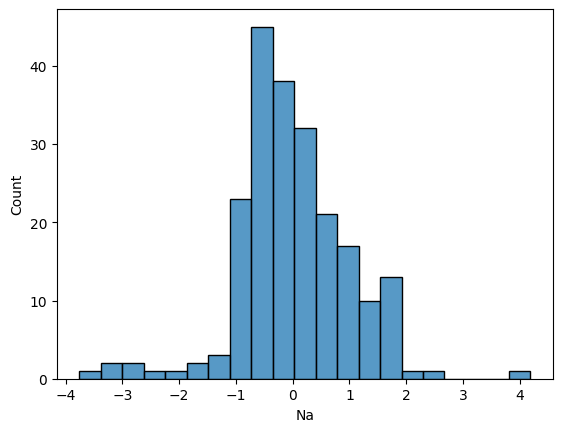

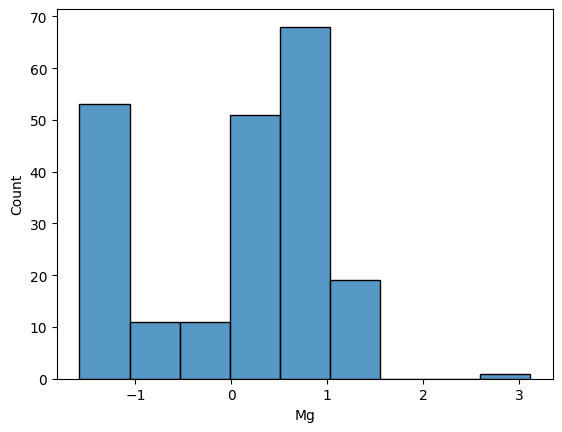

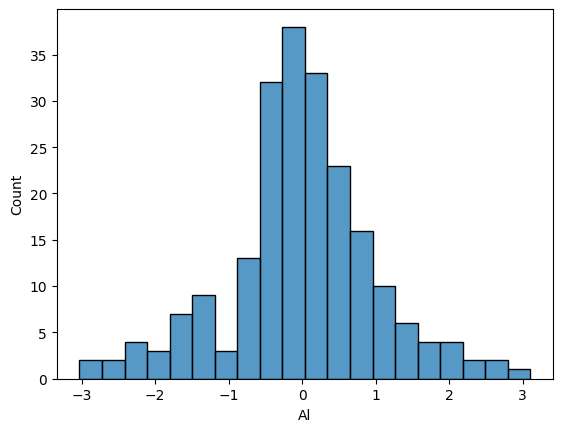

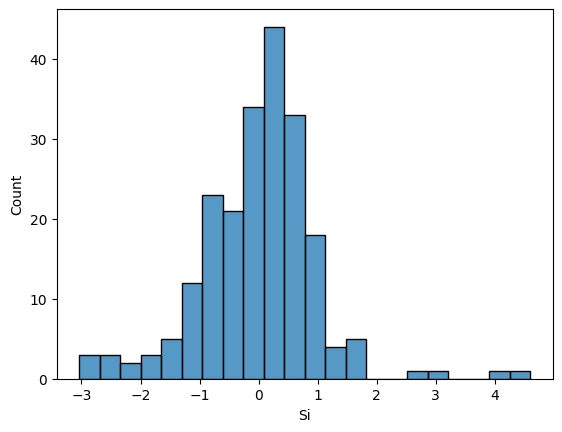

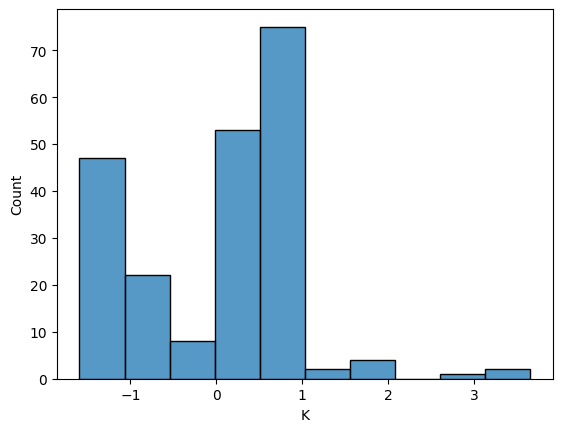

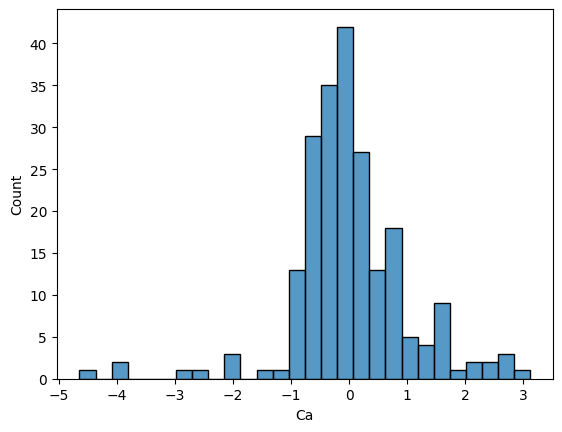

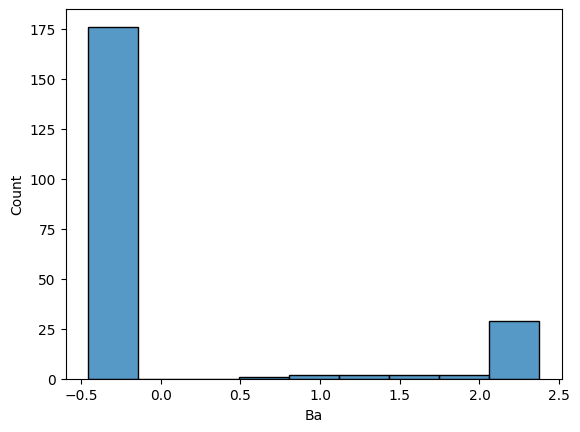

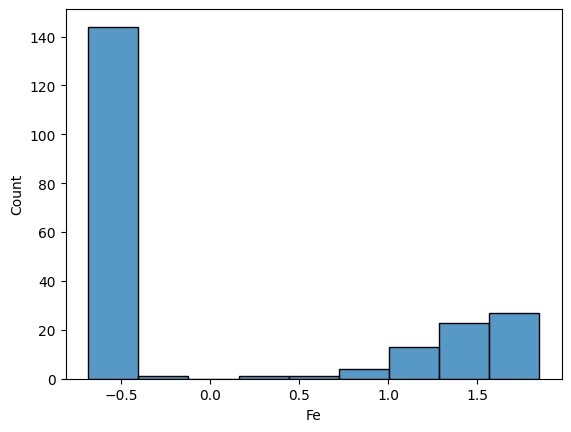

In [99]:
for col in trans_df.columns[1:-1]:
    sns.histplot(x=trans_df[col])
    plt.show()

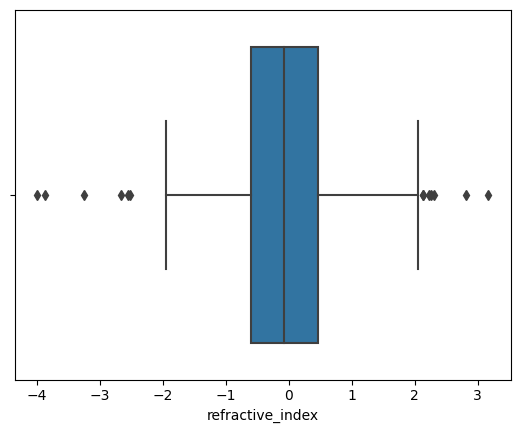

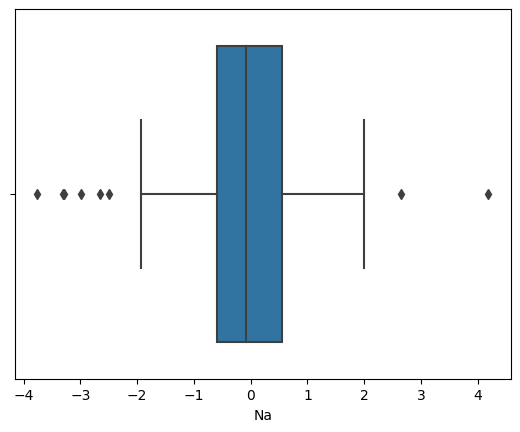

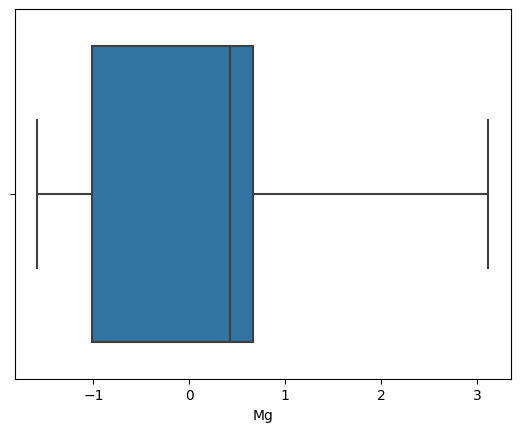

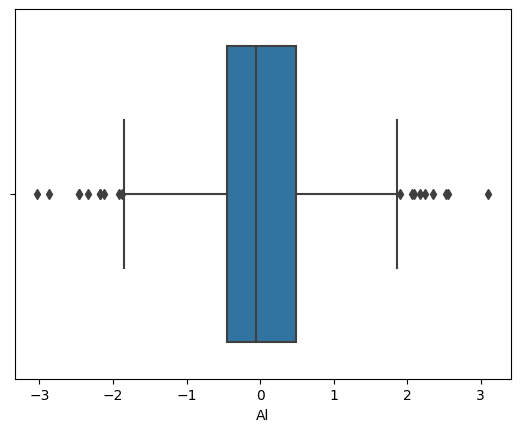

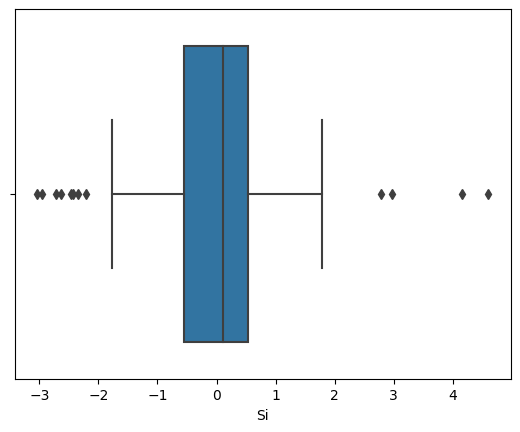

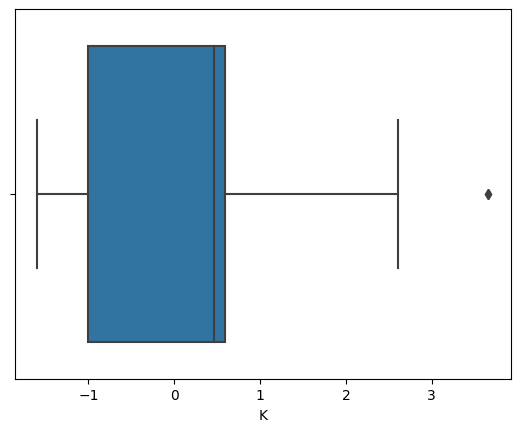

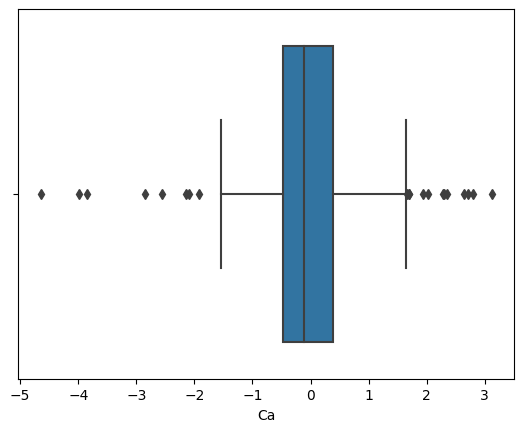

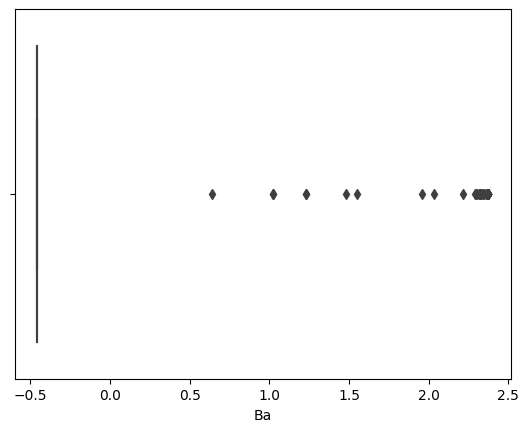

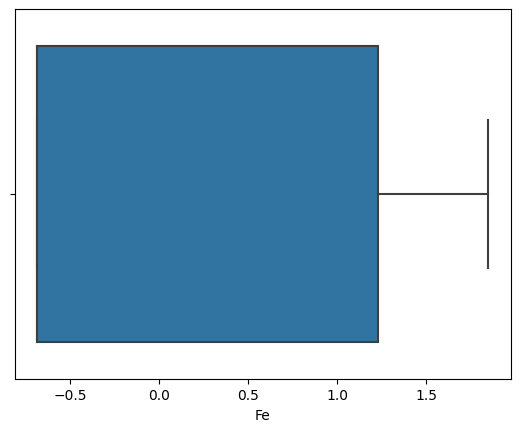

In [100]:
for col in trans_df.columns[1:-1]:
    sns.boxplot(x=trans_df[col])
    plt.show()

## Question 2

## Soybean Data EDA

In [101]:
soybean_df = pd.read_csv('../data/soybean-large.data', header=None)

In [102]:
soybean_df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [103]:
# view the msising values
soybean_df = soybean_df.replace({'?':np.nan})
soybean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       307 non-null    object
 1   1       306 non-null    object
 2   2       299 non-null    object
 3   3       296 non-null    object
 4   4       300 non-null    object
 5   5       266 non-null    object
 6   6       306 non-null    object
 7   7       306 non-null    object
 8   8       266 non-null    object
 9   9       266 non-null    object
 10  10      271 non-null    object
 11  11      306 non-null    object
 12  12      307 non-null    int64 
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      281 non-null    object
 17  17      282 non-null    object
 18  18      277 non-null    object
 19  19      306 non-null    object
 20  20      266 non-null    object
 21  21      296 non-null    object
 22  22      296 non-null    ob

In [104]:
# check if the missing data is associated with a particular class
null_dic = {}
for val in list(soybean_df[0].unique()):
    temp_df = soybean_df[soybean_df[0] == val]
    null_vals = temp_df.isna().sum().sum()
    null_dic[val] = null_vals / (temp_df.shape[0] * temp_df.shape[1])


null_df = pd.DataFrame.from_dict(null_dic, orient='index', columns=['percent_null_values'])
null_df.sort_values(by='percent_null_values', ascending=False)

,percent_null_values
2-4-d-injury,0.833333
cyst-nematode,0.666667
herbicide-injury,0.555556
diaporthe-pod-&-stem-blight,0.314815
phytophthora-rot,0.270833
purple-seed-stain,0.000000
frog-eye-leaf-spot,0.000000
alternarialeaf-spot,0.000000
phyllosticta-leaf-spot,0.000000
anthracnose,0.000000


phytophthora-rot and cyst-nematode and herbicide-injury have more than half of the data missing. They may have a problem with predicting the class. Especially with 2-4-d-injury where there is such a major amount of data missing. For the classes diaporthe-pod-&-stem-blight and phytophthora-rot the values can likely be imputed using either regression or KNN imputer

In [105]:
temp_df = soybean_df[soybean_df[0] == 'diaporthe-pod-&-stem-blight']
temp_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
290,diaporthe-pod-&-stem-blight,5,0,2,2,NaN,3,3,NaN,NaN,...,0,0,1,2,0,1,1,1,1,NaN
291,diaporthe-pod-&-stem-blight,6,0,2,2,NaN,2,3,NaN,NaN,...,0,0,1,2,1,1,1,1,1,NaN
292,diaporthe-pod-&-stem-blight,5,0,2,2,NaN,3,3,NaN,NaN,...,0,0,1,2,1,1,1,1,1,NaN
293,diaporthe-pod-&-stem-blight,1,1,1,2,NaN,3,0,NaN,NaN,...,0,0,1,2,0,1,1,1,1,NaN
294,diaporthe-pod-&-stem-blight,5,NaN,2,2,NaN,2,3,NaN,NaN,...,0,0,1,2,1,1,1,1,1,NaN
295,diaporthe-pod-&-stem-blight,5,0,2,2,NaN,2,3,NaN,NaN,...,0,0,1,2,1,1,1,1,1,NaN


In [106]:
# how many columns are all NaN
count = 0
null_cols = []
for col in temp_df.columns[1:]:
    if temp_df[col].isna().sum() == len(temp_df[col]):
        null_cols.append(col)
        count += 1

print(f'There are {count} columns with all Null values') 
print(f'That is {100*count / len(temp_df.columns[1:]):.2f}% of the predictor columns')

There are 11 columns with all Null values
That is 31.43% of the predictor columns


In [107]:
# drop the all null columns
soybean_dropped = soybean_df.drop(columns=null_cols)
soybean_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       307 non-null    object
 1   1       306 non-null    object
 2   2       299 non-null    object
 3   3       296 non-null    object
 4   4       300 non-null    object
 5   6       306 non-null    object
 6   7       306 non-null    object
 7   10      271 non-null    object
 8   11      306 non-null    object
 9   12      307 non-null    int64 
 10  19      306 non-null    object
 11  21      296 non-null    object
 12  22      296 non-null    object
 13  23      272 non-null    object
 14  24      296 non-null    object
 15  25      296 non-null    object
 16  26      296 non-null    object
 17  27      296 non-null    object
 18  28      282 non-null    object
 19  29      272 non-null    object
 20  30      278 non-null    object
 21  31      278 non-null    object
 22  32      272 non-null    ob

In [108]:
# check if the missing data is associated with a particular class
null_dic = {}
for val in list(soybean_dropped[0].unique()):
    temp_df = soybean_dropped[soybean_dropped[0] == val]
    null_vals = temp_df.isna().sum().sum()
    null_dic[val] = null_vals / (temp_df.shape[0] * temp_df.shape[1])


null_df = pd.DataFrame.from_dict(null_dic, orient='index', columns=['percent_null_values'])
null_df = null_df.sort_values(by='percent_null_values', ascending=False)
null_df

,percent_null_values
2-4-d-injury,0.920000
herbicide-injury,0.600000
cyst-nematode,0.560000
phytophthora-rot,0.216000
diaporthe-pod-&-stem-blight,0.013333
purple-seed-stain,0.000000
frog-eye-leaf-spot,0.000000
alternarialeaf-spot,0.000000
phyllosticta-leaf-spot,0.000000
anthracnose,0.000000


#### That worsened the percent of missing data for other classes, therefor it is not recommended to drop columns that have all missing values for one class.
Instead it would be better to fill the missing values with the mean, which should not affect the modeling.

In [109]:
high_null_classes = list(null_df.index[:5])
null_class_dic = {}
for clss in high_null_classes:
    temp_df = soybean_df[soybean_df[0] == clss]
    for col in temp_df.columns[1:]:
        if temp_df[col].isna().sum() == len(temp_df[col]):
            if clss in null_class_dic.keys():
                null_class_dic[clss].append(col)
            else:
                null_class_dic[clss] = [col]

for k in null_class_dic.keys():
    print(k)
    print(len(null_class_dic[k]), '\n')

2-4-d-injury
30 

herbicide-injury
20 

cyst-nematode
24 

diaporthe-pod-&-stem-blight
11 



In [117]:
phytophthora_df = soybean_df[soybean_df[0] == 'phytophthora-rot']
phytophthora_df = phytophthora_df.reset_index(drop=True)
imp = IterativeImputer(max_iter = 10, random_state=5)
imp.fit(phytophthora_df.iloc[:, 1:])
phytophthora_final = imp.transform(phytophthora_df.iloc[:, 1:])
phytophthora_final

array([[0., 1., 2., ..., 0., 0., 0.],
       [1., 1., 2., ..., 0., 0., 1.],
       [2., 1., 2., ..., 0., 0., 1.],
       ...,
       [3., 1., 2., ..., 0., 0., 1.],
       [3., 1., 1., ..., 0., 0., 0.],
       [3., 1., 2., ..., 0., 0., 1.]])

In [121]:
phyt_df = pd.DataFrame(phytophthora_final, columns = list(range(1, 36)))
phyt_df = phyt_df.round()
phyt_df[0] = 'phytophthora-rot'
phyt_df.head()

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,0
0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,phytophthora-rot
1,1.0,1.0,2.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,phytophthora-rot
2,2.0,1.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,phytophthora-rot
3,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,phytophthora-rot
4,2.0,1.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,phytophthora-rot


In [123]:
# concat to the final df
soybean_df = soybean_df[~(soybean_df[0] == 'phytophthora-rot')]
soybean_df = pd.concat([soybean_df, phyt_df])

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,0
0,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,diaporthe-stem-canker
1,4,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,diaporthe-stem-canker
2,3,0,2,1,0,1,0,2,1,2,...,0,0,4,0,0,0,0,0,0,diaporthe-stem-canker
3,3,0,2,1,0,1,0,2,0,1,...,0,0,4,0,0,0,0,0,0,diaporthe-stem-canker
4,6,0,2,1,0,2,0,1,0,2,...,0,0,4,0,0,0,0,0,0,diaporthe-stem-canker
